# Support Vector Machine

- Pode ser usado tanto para regressão, quanto para classificação, ambas para os casos linear e não-linear
- Um dos mais populares modelos de ML


#### O que veremos

- O que é o SVM
- Classificação linear com SVM
- Classificação não-linear com SVM


----
## O que é o SVM

 Vamos entender como o SVM funciona olhando para a imagem abaixo.

![img_01](https://jingwen-z.github.io/images/20190423-svm.png)

É fácil concluir que ambas as classes podem ser separadas por uma linha (separação linear).

O gráfico a esquerda representa as fronteiras de decisão dos três possíveis classificadores lineares.

Um primeiro modelo gerou uma fronteira de decisão representada pela linha pontilhada, que claramente é um modelo muito ruim. Os outros dois modelos (roxo e vermelho) se sairam melhor, mas estão muito próximos um do outro, o que pode gerar uma má classificação para novos dados.

Se olharmos para o gráfico da direita, a linha sólida (no meio) representa a fronteira de decisão gerada por um classificador SVM. Ela não só separa amabas as classes, como também dá espaço para novas instâncias serem bem classificadas.

> Podemos pensar em classificadores SVM como o treinamento mais amplo (rua) possível entre as classes,s endo as instâncias localizadas no limite da rua seus *support vectors*.

----

## Classificação usando o LinearSVM

Se fizermos a "rua" muito lagar, podemos acabar gerando um overfitting. Para equilibrar esta largura os modelos de SVC possuem um parâmetro chamado *soft margin classification* (figura abaixo). Se imposermos que todas as instâncias fiquem fora da rua pelo lado direito, estaremos fazendo uma classificação a força, o que fará com que o modelo não performe bem.

![fig_02](https://img2018.cnblogs.com/blog/1012590/201903/1012590-20190331160549758-1258657163.png)

Afim de evitar este problema, é preferível usar um modelo mais flexível. **Objetivo**: achar um bom balanço entre manter a rua mais larga o possível e limitar as violações de margem.  A este problema é que damos o nome de *soft margin classification*.


No scikit-learn, este hiperparâmetro é denotado por `c`. Um valor pequeno de `c` leva a uma rua mais larga, mas gera um maior número de violações de margem (figura abaixo).

![fig_03](https://img2018.cnblogs.com/blog/1012590/201903/1012590-20190331162727069-1127451993.png)

Vamos exemplificar o uso do SVM para classificação Linear usando o dataset Iris para fazer uma classificação apenas para detectar flores do tipo Iris-Virginica.

In [52]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [53]:
# obtendo os dados
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [54]:
X = iris["data"][:, (2, 3)]
X[:5]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

In [55]:
y = (iris["target"]==2).astype(np.float64)
y[:5]

array([0., 0., 0., 0., 0.])

In [56]:
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("LinearSVC", LinearSVC(C=1, loss="hinge", random_state=42)),
])

In [57]:
svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('LinearSVC', LinearSVC(C=1, loss='hinge', random_state=42))])

In [58]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

Mesmo sendo um classificador eficiente, o `LinearSVC()` não irá resolver o problema de datasets não-lineares.

Para este tipo de problema, podemos usar mais parâmetros para tentar fazer um melhor aprendizado. Aqui vamos ver o `PolynomialFeatures()` para aumentarmos o grau do nosso modelo.

Uma revisãozinha (apenas em 2d $(x, y)$):

Quando falamos de modelos lineares, estamos falando da equação da reta:

$$
    y = ax + b
$$

sendo $a$ e $b$ os parâmetros que queremos aprender.

Ao adicionarmos o argumento `PolynomialFeatures()`, temos a possibilidade de aumentar o grau desta equação, por exemplo, para o segundo grau: `PolynomialFeatures(degree=2)`:

$$
    y = ax + bx^2 + c
$$

o que nos dá 3 parâmetros a serem aprendidos: $a, b, c$.

No que se segue, vamos usar um polinômio de grau 3:
$$
    y = ax + bx^2 + cx^3 + d
$$

ou seja, 4 parâmetros: $a, b, c, d$



In [59]:
# imports específicos para este modelo
from sklearn.preprocessing import PolynomialFeatures

In [60]:
polyb_svm_clf = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scalar', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))
])

polyb_svm_clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scalar', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

![k-fold](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [61]:
from sklearn.model_selection import cross_val_score

In [62]:
scores_pol = cross_val_score(polyb_svm_clf, X, y, cv=23)

In [63]:
scores_pol.mean()

0.9513457556935817

In [64]:
scores_svm = cross_val_score(svm_clf, X, y, cv=5)

In [65]:
scores_svm.mean()

0.9533333333333334

A diferença entro os dois é no número de k-folds que precisamos para o polynomial pecisamos de `cv=23` para obtertmos uma convergência, enquanto que no caso linear, precisamos de apenas 5.

Vamos dar uma olhada nas classificações.

In [66]:
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

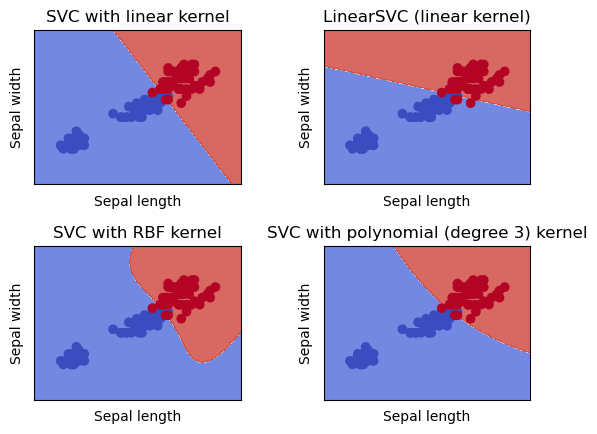

In [67]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
# create a mesh to plot in
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

-----

## Árvores de Decisão

- Assim como SVM, Árvores de Decisão (decision trees) são bem populares em ML e podem realizar tarefas tanto de classificação, quanto de regressão.
- São as bases do Random Forest, um dos modelos mais poderosos que temos em ML hoje em dia.
- Tem como vantagem de necessitar de muito pouca preparação dos dados.

#### Treinamento e visualização de uma decision tree

Vamos começar treinando uma decision tree simples para o dataset iris


In [68]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [69]:
iris = load_iris()
X = iris.data[:, (2, 3)]
y = iris.target

In [70]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [71]:
# importamos a biblioteca para visualização
from sklearn.tree import export_graphviz

In [72]:
export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

In [82]:
# para gerarmos uma imagem png, ou pdf, ou jpg .... a partir do *.dot, precisamos do graphviz
# link para download: https://gitlab.com/api/v4/projects/4207231/packages/generic/graphviz-releases/6.0.1/windows_10_cmake_Release_graphviz-install-6.0.1-win64.exe
!dot -Tpng ../imgs/iris_tree.dot -o ../imgs/iris.png


Error: dot: can't open ../imgs/iris_tree.dot: No such file or directory


Pergunta: como fazemos previsões usando a árvore abaixo:

![fig_04](../imgs/iris.png)

    Começando da raiz da árvore (depth 0, top): petal length <= 2.45 cm.

        | Se True => passamos para o nó filho da raiz, à esquerda (depth 1, left):
        |     | Possui algum nó filho?
        |     |      Se Não => Fim, a árvore prevê que a flor é da classe SETOSA
        -----------------------------------------------------------------------------------
        | Se False => passamos para o nó filho da raiz, à direita (depth 1, right):
        |     | Peta width <= 1.75 cm:
        |     |     Se Sim => passamos para o nó raiz, à esquerda (depth 2, left)
        |     |         Possui algum nó filho?
        |     |             Se Não => Fim, a árvore prevê que a flor é da classe VIRGINICA
        |     -----------------------------------------------------------------------------
        |     | Se não => passamos para o nó raiz, à direita (depth 2, rigth)
        |     |     Possui algum nó filho?
        |     |          Se Não => Fim, a árvore prevê que a flor é da classe VERISICOLOR

-----

O modelo já está treinado e já podemos usá-lo para realizar previsões.

In [74]:
tree_clf.predict_proba([[4.5, 2]])

array([[0.        , 0.02173913, 0.97826087]])

In [75]:
tree_clf.predict([[4.5, 2]])

array([2])

In [76]:
# cross-validation
scores_tree = cross_val_score(tree_clf, X, y, cv=5)

In [77]:
scores_tree.mean()

0.9333333333333332

Se olharmos para a árvore, veremos 3 informações adicionais:

- Samples:

    Valor de quantas amostras de treino o nó possui.

- Values:

    Nos diz quantas amostras de cada classe temos na amostra.


- gini:

    Medida de impureza de um nó. Um nó é dito puro quando todas as instâncias de treino pertencem a mesma classe. Exemplo: setosa é uma classe "pura"

    $$
        G(p) = \sum_{k=1}^{N} p_k (1 - p_k) = 1 - \sum_{k=1}^{K} p_{k}^{2}
    $$

Exemplo: Verisicolor => $G(p) = 1 - \left( \frac{0}{54} \right)^2 - \left( \frac{49}{54} \right)^2 - \left( \frac{5}{54} \right)^2 \approx 0.168$


-----

### Regressão com Decision Tree

In [78]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
%matplotlib inline

In [79]:
# vamos usar um dataset sintético apenas para exemplificar o uso
dataset = np.array(
[[2,4],
 [3,9],
 [4,16],
 [5,25],
 [6,36],
 [8,64],
 [10,100],
 [12,144],
 [13,169]
])
X = dataset[:, 0:1].astype(int)
y = dataset[:,1].astype(int)

In [80]:
tree_rg = DecisionTreeRegressor(max_depth=5)
tree_rg.fit(X, y)

DecisionTreeRegressor(max_depth=5)

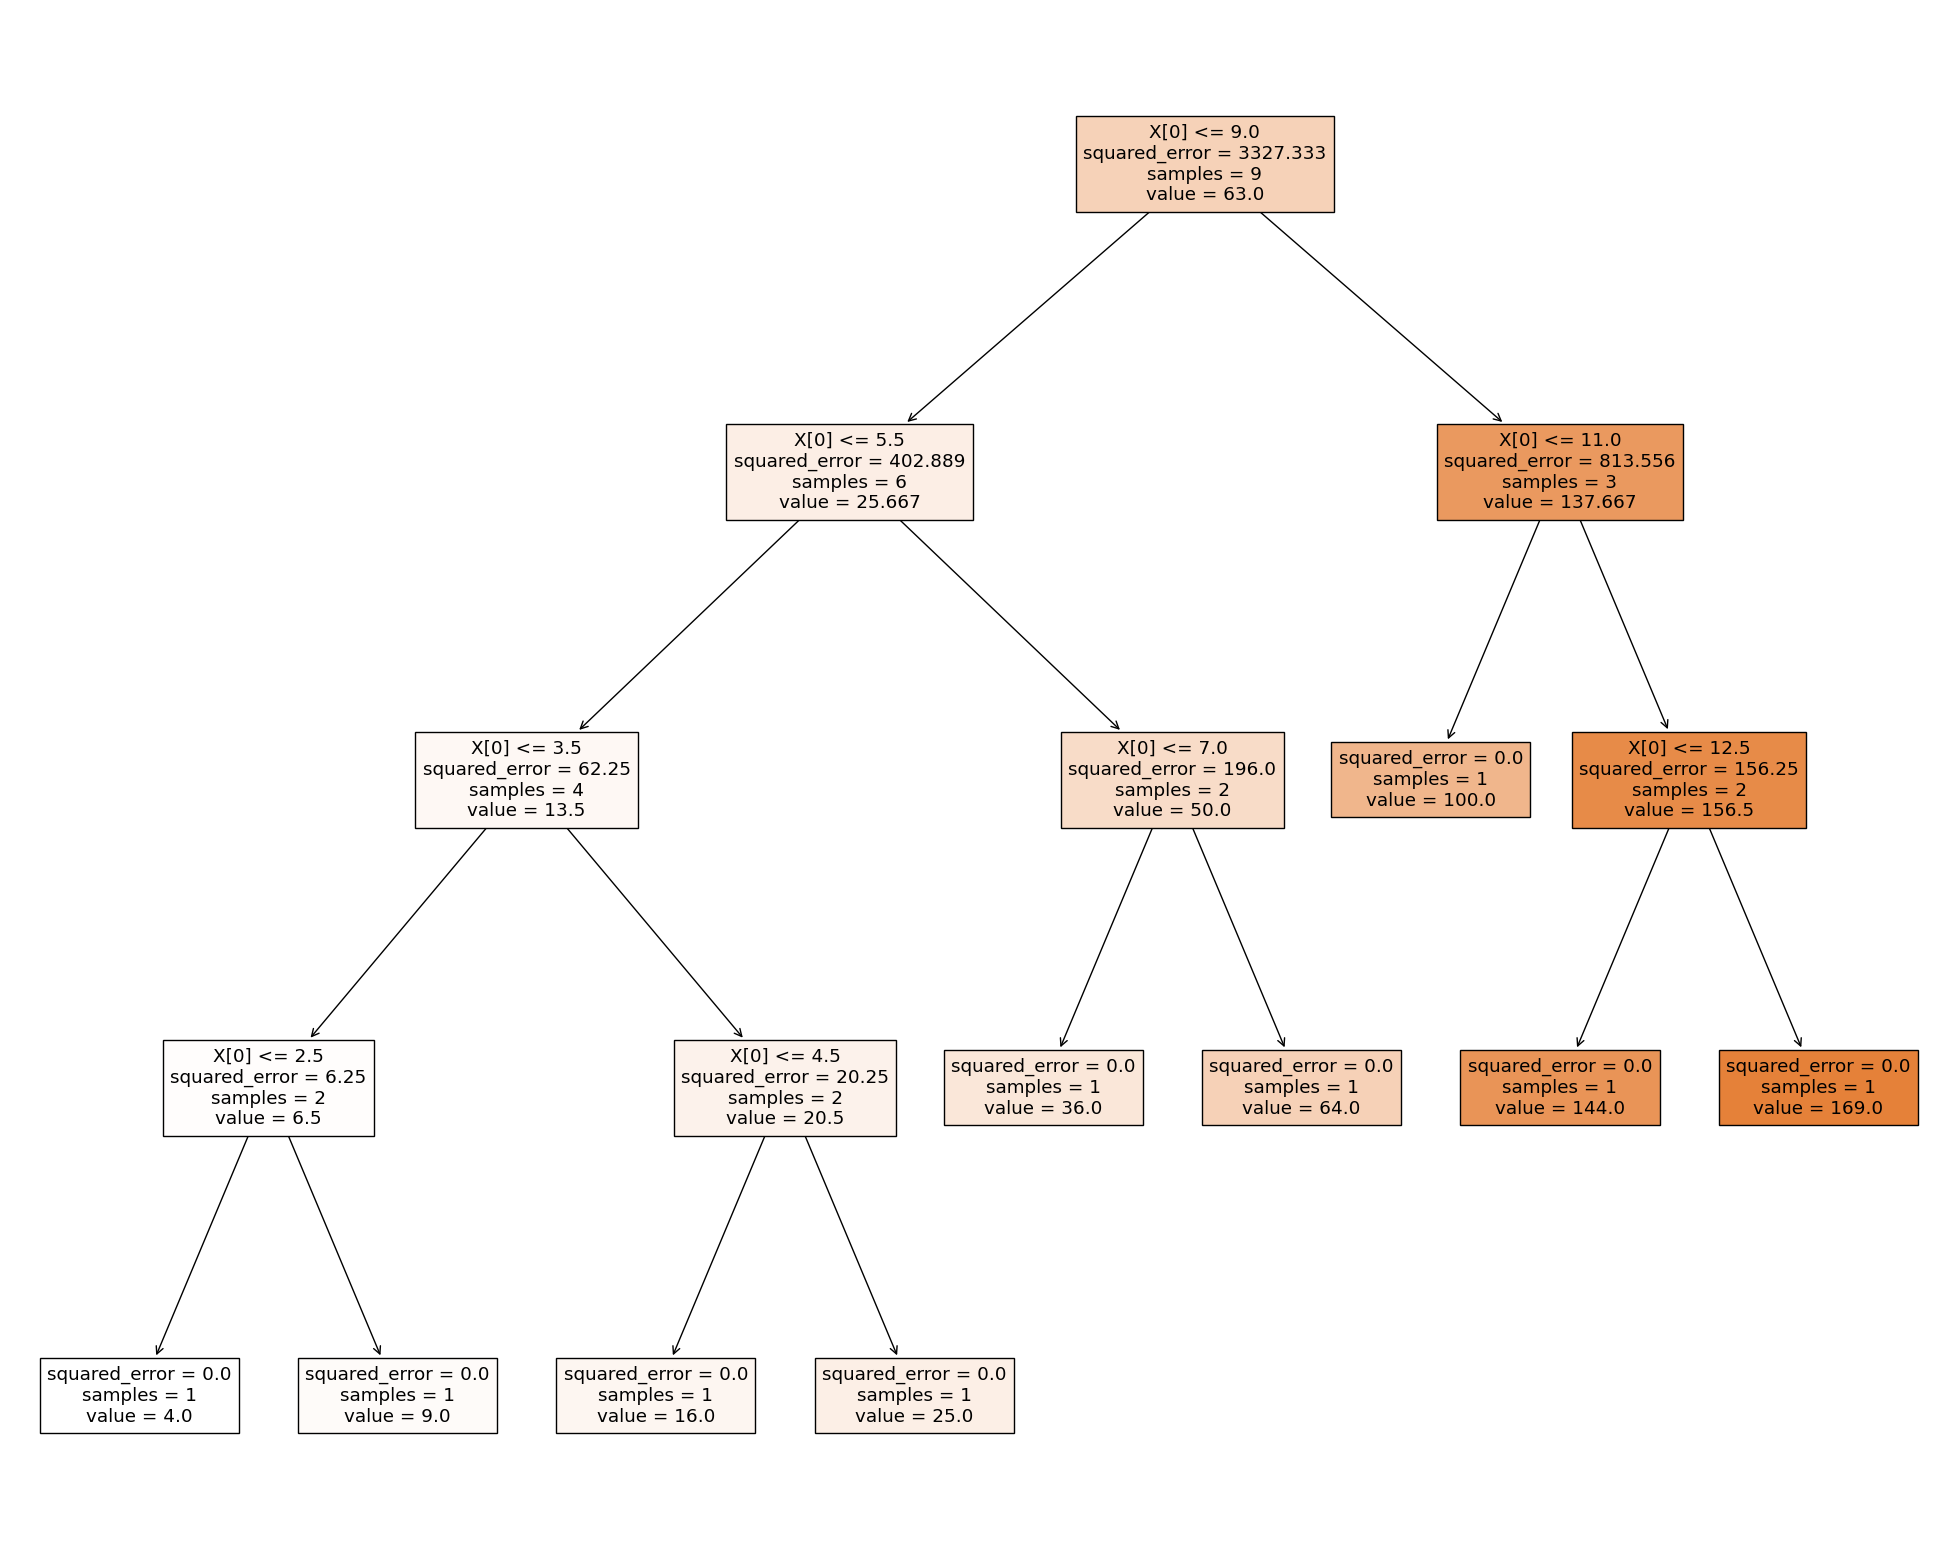

In [81]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(tree_rg,
            filled=True)